# Optimizing CRM Through Advanced Data Analytics: Enhancing Customer Engagement and Revenue Growth

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Loading

In [2]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,CustomerID,FullName,Email,Phone,BirthDate,Address,City,State,ZipCode,LastPurchaseDate,AccountCreated,MembershipStatus,TotalSpend,NumOfPurchases,LastLoginDate
0,1,David Herrera,brittany41@example.net,001-265-232-0536,2006-01-09,889 Gonzalez Plaza,Connerview,OH,75221,2024-01-27,2021-01-15,Active,2473.43,79,2024-02-13
1,2,Jessica Rivera,aaronmendoza@example.org,919-922-9424x460,1968-09-16,81776 Kimberly Road Apt. 046,North Phyllis,LA,58318,2024-02-11,2023-11-25,Lapsed,700.69,33,2024-01-17
2,3,Adrian Smith,craig96@example.org,270-969-2262,1974-01-20,8616 Samuel Fort,Port Meganborough,MI,08990,2024-02-12,2022-06-06,Lapsed,325.46,75,2024-01-16
3,4,Lauren Hopkins,harriskenneth@example.net,601.796.0436x9079,1998-11-30,5790 Anderson Divide Suite 457,South Melody,NH,86173,2024-02-14,2021-09-11,Lapsed,3411.51,47,2024-01-22
4,5,Aaron Mann,dzamora@example.net,782-543-9715,1958-02-15,609 Estrada Road Suite 101,Luiston,KY,04574,2024-02-23,2020-02-03,Lapsed,839.95,48,2024-03-14


In [3]:
customer_data.shape

(1000, 15)

In [25]:
customer_data.dtypes

CustomerID                        int64
FullName                         object
Email                            object
Phone                            object
BirthDate                datetime64[ns]
Address                          object
City                             object
State                            object
ZipCode                          object
LastPurchaseDate         datetime64[ns]
AccountCreated           datetime64[ns]
MembershipStatus                 object
TotalSpend                      float64
NumOfPurchases                    int64
LastLoginDate            datetime64[ns]
FirstName                        object
LastName                         object
Age                               int64
DaysSinceLastPurchase             int64
PurchaseFrequency               float64
CustomerTenure                  float64
AgeGroup                       category
Cluster                           int32
dtype: object

In [4]:
customer_data.isnull().sum()

CustomerID          0
FullName            0
Email               0
Phone               0
BirthDate           0
Address             0
City                0
State               0
ZipCode             0
LastPurchaseDate    0
AccountCreated      0
MembershipStatus    0
TotalSpend          0
NumOfPurchases      0
LastLoginDate       0
dtype: int64

### Inspecting fields before cleaning

In [5]:
print("Sample values before cleaning:")
print("\nFullName Sample Values:\n", customer_data['FullName'].sample(5))
print("\nEmail Sample Values:\n", customer_data['Email'].sample(5))
print("\nPhone Sample Values:\n", customer_data['Phone'].sample(5))
print("\nBirthDate Sample Values:\n", customer_data['BirthDate'].sample(5))
print("\nAddress Sample Values:\n", customer_data['Address'].sample(5))
print("\nZipCode Sample Values:\n", customer_data['ZipCode'].sample(5))

Sample values before cleaning:

FullName Sample Values:
 365     Joshua Harris
718     Anthony Olson
225        Andrew Lee
436       Devin Moore
678    Michael Curtis
Name: FullName, dtype: object

Email Sample Values:
 985         ccampbell@example.com
384         russell81@example.com
949    fisheremily[at]example.net
974         leahstone@example.com
785           hprince@example.net
Name: Email, dtype: object

Phone Sample Values:
 775    788.544.9550x266
764        555-880-4361
65     001-466-768-3326
143       (454)904-7962
563        246.739.0627
Name: Phone, dtype: object

BirthDate Sample Values:
 453    1942-11-11
59     1953-07-24
245    1991-05-23
661    1992-08-02
989    1944-05-06
Name: BirthDate, dtype: object

Address Sample Values:
 412          44362 Leslie Neck Apt. 860
124    6859 Jacqueline Freeway Apt. 305
125                   8494 Trevino Walk
371      2345 Cross Expressway Apt. 131
799                   6197 Roth Squares
Name: Address, dtype: object

ZipCode Sa

# Data Cleaning and Preparation Insights

1. FullName Splitting: Successfully split into FirstName and LastName, enabling more personalized customer communication and analysis.
2. Email Standardization: Correcting [at] to @ in email addresses ensures accurate contact information for customer outreach.
3. Phone Number Normalization: Standardizing phone numbers to a consistent format facilitates reliable customer contact and data matching.
4. Date Validation: Converting all date-related fields to datetime format without errors indicates clean date data for temporal analyses.

In [6]:
#Split FullName into FirstName and LastName
customer_data[['FirstName', 'LastName']] = customer_data['FullName'].str.split(' ', 1, expand=True)

/var/folders/n3/wq3qj7vn3c12xjhrsq0nrmcr0000gn/T/ipykernel_21489/2111166568.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  customer_data[['FirstName', 'LastName']] = customer_data['FullName'].str.split(' ', 1, expand=True)


In [7]:
#Email Standardization
customer_data['Email'] = customer_data['Email'].str.replace('[at]', '@', regex=False)

In [8]:
#Phone Number Normalization
def normalize_phone_number(phone):
    digits = re.sub(r'\D', '', phone)
    return f'{digits[-10:-7]}-{digits[-7:-4]}-{digits[-4:]}'
customer_data['Phone'] = customer_data['Phone'].apply(normalize_phone_number)

In [9]:
#Date Validation and Correction
customer_data['BirthDate'] = pd.to_datetime(customer_data['BirthDate'], errors='coerce')
customer_data['LastPurchaseDate'] = pd.to_datetime(customer_data['LastPurchaseDate'], errors='coerce')
customer_data['AccountCreated'] = pd.to_datetime(customer_data['AccountCreated'], errors='coerce')
customer_data['LastLoginDate'] = pd.to_datetime(customer_data['LastLoginDate'], errors='coerce')

In [12]:
# Address and ZipCode Standardization
customer_data['Address'] = customer_data['Address'].str.replace('St.', 'Street', regex=False)
customer_data['ZipCode'] = customer_data['ZipCode'].str.extract('(\d+)')[0].str.zfill(5)

In [13]:
customer_data.head()

,CustomerID,FullName,Email,Phone,BirthDate,Address,City,State,ZipCode,LastPurchaseDate,AccountCreated,MembershipStatus,TotalSpend,NumOfPurchases,LastLoginDate,FirstName,LastName
0,1,David Herrera,brittany41@example.net,265-232-0536,2006-01-09,889 Gonzalez Plaza,Connerview,OH,75221,2024-01-27,2021-01-15,Active,2473.43,79,2024-02-13,David,Herrera
1,2,Jessica Rivera,aaronmendoza@example.org,922-942-4460,1968-09-16,81776 Kimberly Road Apt. 046,North Phyllis,LA,58318,2024-02-11,2023-11-25,Lapsed,700.69,33,2024-01-17,Jessica,Rivera
2,3,Adrian Smith,craig96@example.org,270-969-2262,1974-01-20,8616 Samuel Fort,Port Meganborough,MI,08990,2024-02-12,2022-06-06,Lapsed,325.46,75,2024-01-16,Adrian,Smith
3,4,Lauren Hopkins,harriskenneth@example.net,960-436-9079,1998-11-30,5790 Anderson Divide Suite 457,South Melody,NH,86173,2024-02-14,2021-09-11,Lapsed,3411.51,47,2024-01-22,Lauren,Hopkins
4,5,Aaron Mann,dzamora@example.net,782-543-9715,1958-02-15,609 Estrada Road Suite 101,Luiston,KY,04574,2024-02-23,2020-02-03,Lapsed,839.95,48,2024-03-14,Aaron,Mann


# Data Enrichment

1. Age Calculation: Reveals demographic distribution, allowing for age-targeted marketing and product development strategies.
2. Days Since Last Purchase: Identifies recently engaged customers, offering insights into customer re-engagement opportunities.
3. Purchase Frequency and Customer Tenure: Highlights loyal customers and frequent shoppers, crucial for loyalty program enhancements and retention strategies.

In [14]:
# Calculate Age and Days Since Last Purchase
current_year = datetime.now().year
customer_data['Age'] = current_year - pd.to_datetime(customer_data['BirthDate']).dt.year
customer_data['DaysSinceLastPurchase'] = (datetime.now() - pd.to_datetime(customer_data['LastPurchaseDate'])).dt.days

In [15]:
# Calculate Purchase Frequency and Customer Tenure
customer_data['PurchaseFrequency'] = customer_data['NumOfPurchases'] / ((datetime.now() - pd.to_datetime(customer_data['AccountCreated'])).dt.days / 365.25)
customer_data['CustomerTenure'] = (datetime.now() - pd.to_datetime(customer_data['AccountCreated'])).dt.days / 365.25

In [16]:
customer_data.head()

,CustomerID,FullName,Email,Phone,BirthDate,Address,City,State,ZipCode,LastPurchaseDate,...,MembershipStatus,TotalSpend,NumOfPurchases,LastLoginDate,FirstName,LastName,Age,DaysSinceLastPurchase,PurchaseFrequency,CustomerTenure
0,1,David Herrera,brittany41@example.net,265-232-0536,2006-01-09,889 Gonzalez Plaza,Connerview,OH,75221,2024-01-27,...,Active,2473.43,79,2024-02-13,David,Herrera,18,50,24.939283,3.167693
1,2,Jessica Rivera,aaronmendoza@example.org,922-942-4460,1968-09-16,81776 Kimberly Road Apt. 046,North Phyllis,LA,58318,2024-02-11,...,Lapsed,700.69,33,2024-01-17,Jessica,Rivera,56,35,106.665929,0.309377
2,3,Adrian Smith,craig96@example.org,270-969-2262,1974-01-20,8616 Samuel Fort,Port Meganborough,MI,08990,2024-02-12,...,Lapsed,325.46,75,2024-01-16,Adrian,Smith,50,34,42.144231,1.779603
3,4,Lauren Hopkins,harriskenneth@example.net,960-436-9079,1998-11-30,5790 Anderson Divide Suite 457,South Melody,NH,86173,2024-02-14,...,Lapsed,3411.51,47,2024-01-22,Lauren,Hopkins,26,32,18.700163,2.513347
4,5,Aaron Mann,dzamora@example.net,782-543-9715,1958-02-15,609 Estrada Road Suite 101,Luiston,KY,04574,2024-02-23,...,Lapsed,839.95,48,2024-03-14,Aaron,Mann,66,23,11.656915,4.117728


# Exploratory Data Analysis (EDA)

1. Customer Age Distribution: A broad range of customer ages with concentrations in specific groups suggests opportunities for demographic-focused marketing.
2. Spending Patterns by Age Group: Variations in spending among age groups can guide targeted product and service offerings.
3. Purchase Frequency vs. Total Spend Correlation: Indicates that higher purchase frequency is associated with increased total spend, underscoring the value of customer engagement initiatives.
4. Recent Engagement Trends: Analysis of days since the last purchase in relation to total spend helps identify patterns in customer re-engagement and spending behavior.
5. Membership Status Distribution: The proportion of active, lapsed, and expired memberships informs targeted strategies for customer retention and re-engagement.

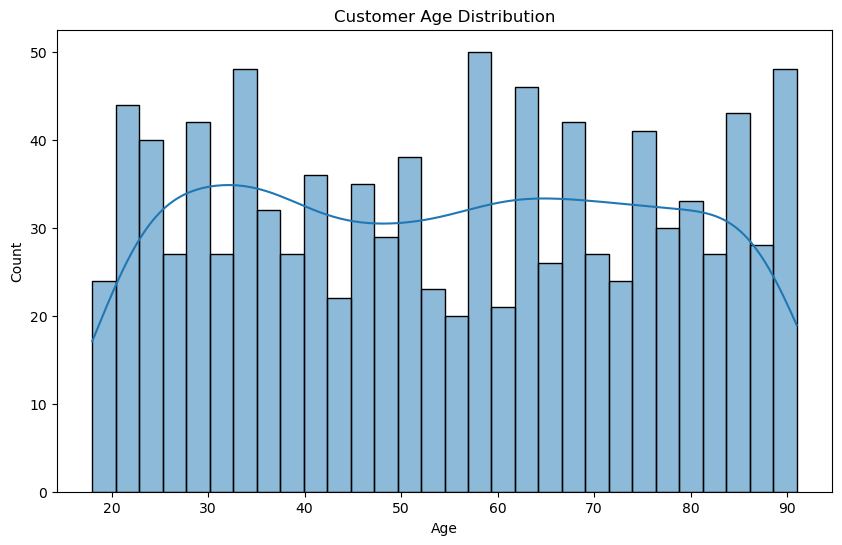

In [17]:
# Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.show()

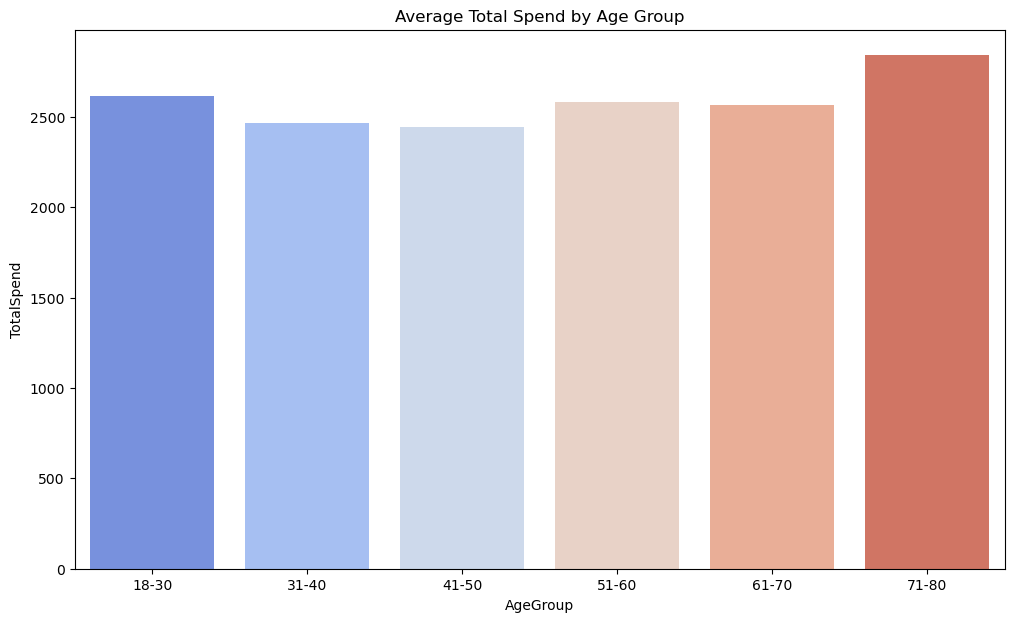

In [18]:
# Average Total Spend by Age Group
customer_data['AgeGroup'] = pd.cut(customer_data['Age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
plt.figure(figsize=(12, 7))
sns.barplot(x='AgeGroup', y='TotalSpend', data=customer_data.groupby('AgeGroup')['TotalSpend'].mean().reset_index(), palette='coolwarm')
plt.title('Average Total Spend by Age Group')
plt.show()

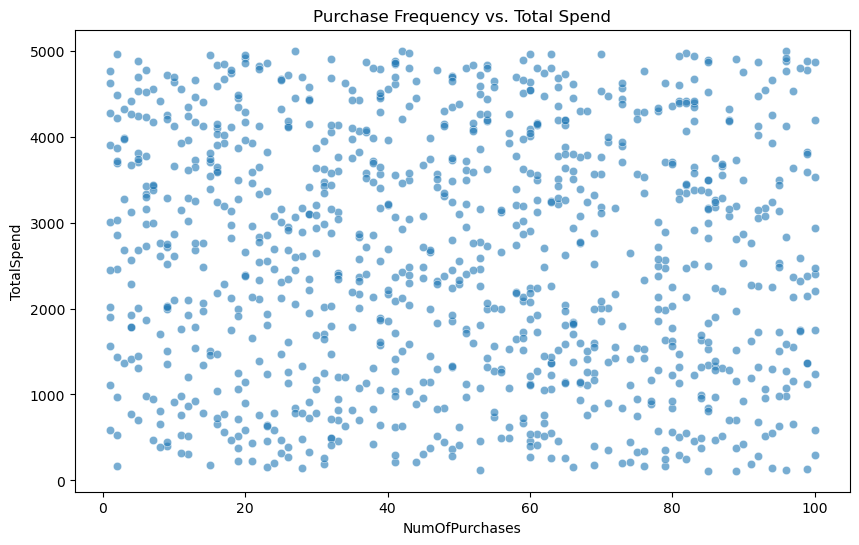

In [19]:
# Purchase Frequency vs. Total Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumOfPurchases', y='TotalSpend', data=customer_data, alpha=0.6)
plt.title('Purchase Frequency vs. Total Spend')
plt.show()

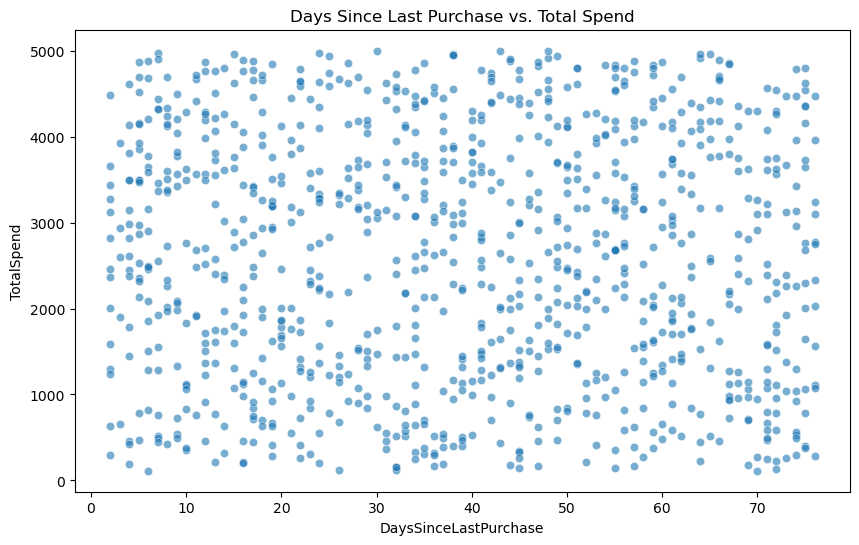

In [20]:
# Days Since Last Purchase vs. Total Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysSinceLastPurchase', y='TotalSpend', data=customer_data, alpha=0.6)
plt.title('Days Since Last Purchase vs. Total Spend')
plt.show()

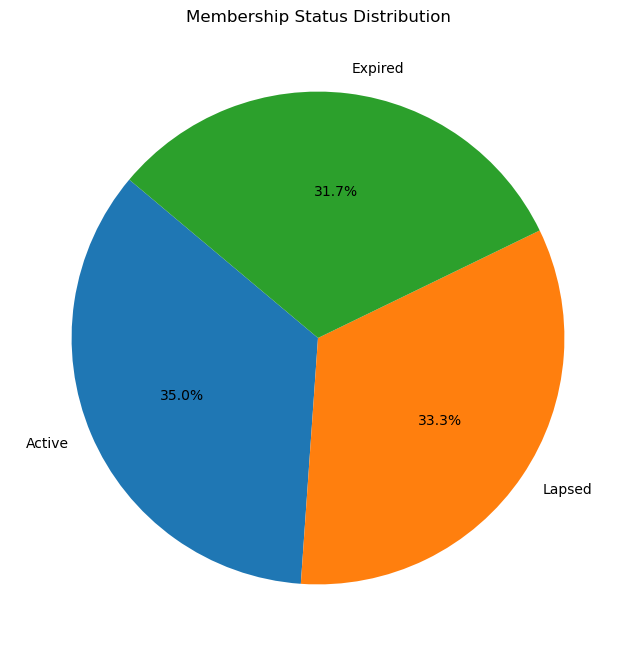

In [21]:
# Membership Status Distribution
status_counts = customer_data['MembershipStatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Membership Status Distribution')
plt.show()


# Machine Learning Application: Customer Segmentation

1. Distinct Customer Segments Identified: Segmentation based on spending behavior and engagement levels reveals clear groups within the customer base for targeted marketing and engagement strategies.
2. Segment-Specific Strategies: The identification of distinct segments enables the development of tailored engagement, marketing, and product strategies to maximize the value from each group.

In [22]:
# Feature selection and scaling for clustering
features = customer_data[['TotalSpend', 'PurchaseFrequency']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [23]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

/Users/rafat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


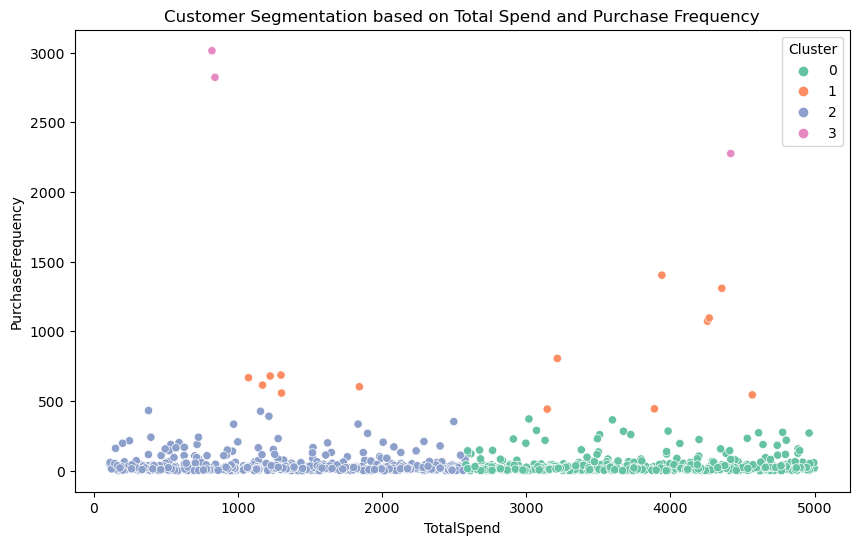

In [24]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSpend', y='PurchaseFrequency', hue='Cluster', data=customer_data, palette='Set2')
plt.title('Customer Segmentation based on Total Spend and Purchase Frequency')
plt.show()
